In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score

In [24]:
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # Extra weight for bias
        self.lr = lr  # Learning rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Bias term
        return self.activation(np.dot(self.weights, x))

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                x_i = np.insert(X[i], 0, 1)  # Adding bias
                y_pred = self.activation(np.dot(self.weights, x_i))
                error = y[i] - y_pred
                self.weights += self.lr * error * x_i  # Weight update

In [25]:
# NAND Dataset
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, 0])  # NAND output

# XOR Dataset (Non-linearly separable)
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR output

In [26]:
# Train on NAND
perceptron_nand = Perceptron(input_size=2)
perceptron_nand.train(X_nand, y_nand)
y_pred_nand = np.array([perceptron_nand.predict(x) for x in X_nand])
print("\nNAND Perceptron Results:")
for x in X_nand:
    print(f"Input: {x}, Output: {perceptron_nand.predict(x)}")


NAND Perceptron Results:
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 0


In [27]:
# Train on XOR
perceptron_xor = Perceptron(input_size=2)
perceptron_xor.train(X_xor, y_xor)
y_pred_xor = np.array([perceptron_xor.predict(x) for x in X_xor])
print("\nXOR Perceptron Results:")
for x in X_xor:
    print(f"Input: {x}, Output: {perceptron_xor.predict(x)}")


XOR Perceptron Results:
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 0
Input: [1 1], Output: 0


Accuracy of Perceptron for NAND: 100.0%


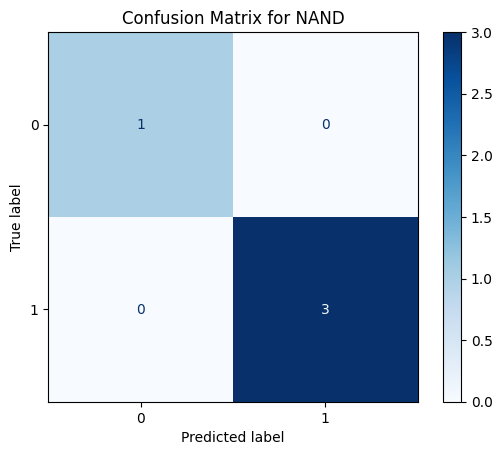

In [28]:
nand_accuracy = accuracy_score(y_nand,y_pred_nand)
print(f"Accuracy of Perceptron for NAND: {nand_accuracy*100}%")

# Compute confusion matrix
cm_nand = confusion_matrix(y_nand, y_pred_nand)

# Display confusion matrix with a different color map
disp = ConfusionMatrixDisplay(cm_nand)
disp.plot(cmap='Blues')  # Change 'Blues' to other color maps

plt.title("Confusion Matrix for NAND")
plt.show()

Accuracy of Perceptron for XOR:50.0 %


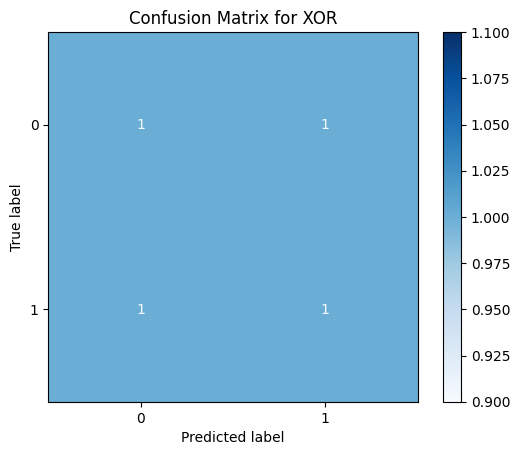

In [29]:
xor_accuracy = accuracy_score(y_xor,y_pred_xor)
print(f"Accuracy of Perceptron for XOR:{xor_accuracy*100} %")


# Compute Confusion Matrix for XOR
cm_xor = confusion_matrix(y_xor, y_pred_xor)

# Plot Confusion Matrix
disp_xor = ConfusionMatrixDisplay(cm_xor)
disp_xor.plot(cmap='Blues')  # Using 'Blues' color map for differentiation
plt.title("Confusion Matrix for XOR")
plt.show()